In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import ClassificationReport, ROCAUC, DiscriminationThreshold, ClassPredictionError, ConfusionMatrix

# Read the CSV file into a pandas DataFrame
matches = pd.read_csv('matches4.csv', index_col=0)

# Convert the 'date' column to datetime format
matches['date'] = pd.to_datetime(matches['date'])

# Convert the 'venue' column to categorical type and encode it as numerical codes
matches['vcode'] = matches['venue'].astype('category').cat.codes

# Convert the 'opponent' column to categorical type and encode it as numerical codes
matches['opcode'] = matches['opponent'].astype('category').cat.codes

# Extract the hour from the 'time' column and convert it to integer format
matches['hour'] = matches['time'].str.replace(':.+', '', regex=True).astype('int')

# Extract the day of the week from the 'date' column and encode it as numerical codes
matches['dcode'] = matches['date'].dt.dayofweek

# Create a binary target column indicating whether the result is 'W' (win)
matches['target'] = (matches['result'] == 'W').astype('int')

# Split the data into training and test sets based on the 'date' column
train = matches[matches['date'] < '2022-01-01'].copy()
test = matches[matches['date'] > '2022-01-01'].copy()

# Define the predictors for the models
predictors = ['poss', 'sot', 'xg', 'xga']

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
train.loc[:, predictors] = imputer.fit_transform(train[predictors])
test.loc[:, predictors] = imputer.transform(test[predictors])

# Initialize and fit a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(train[predictors], train['target'])

# Initialize and fit a Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=1)
gb.fit(train[predictors], train['target'])

# Make predictions on the test data using Random Forest
rf_preds = rf.predict(test[predictors])

# Make predictions on the test data using Gradient Boosting
gb_preds = gb.predict(test[predictors])



In [2]:
# Calculate the accuracy score and precision of Random Forest predictions
rf_acc = accuracy_score(test['target'], rf_preds)
rf_precision = precision_score(test['target'], rf_preds)
print("Random Forest Accuracy:", rf_acc)
print("Random Forest Precision:", rf_precision)


Random Forest Accuracy: 0.7160278745644599
Random Forest Precision: 0.6487804878048781


C:\Users\carso\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


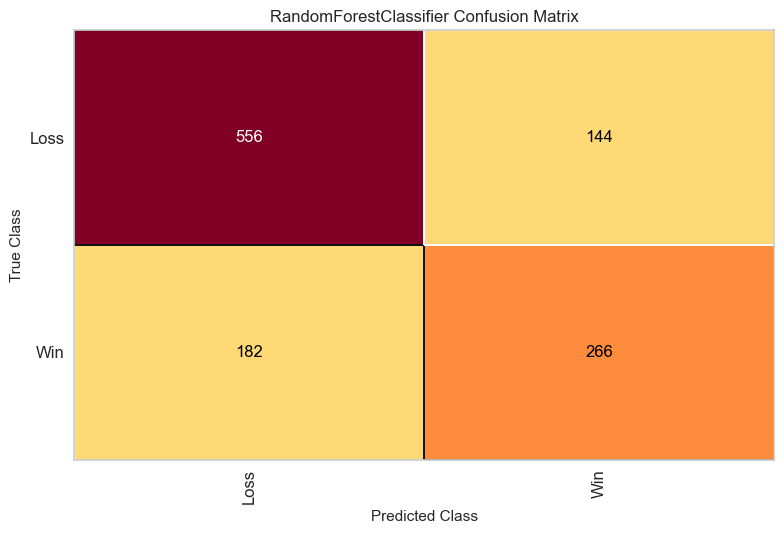

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [3]:
# Generate confusion matrix for Random Forest
cm_rf = ConfusionMatrix(rf, classes=['Loss', 'Win'], label_encoder={0: 'Loss', 1: 'Win'})
cm_rf.score(test[predictors], test['target'])
cm_rf.show()


C:\Users\carso\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


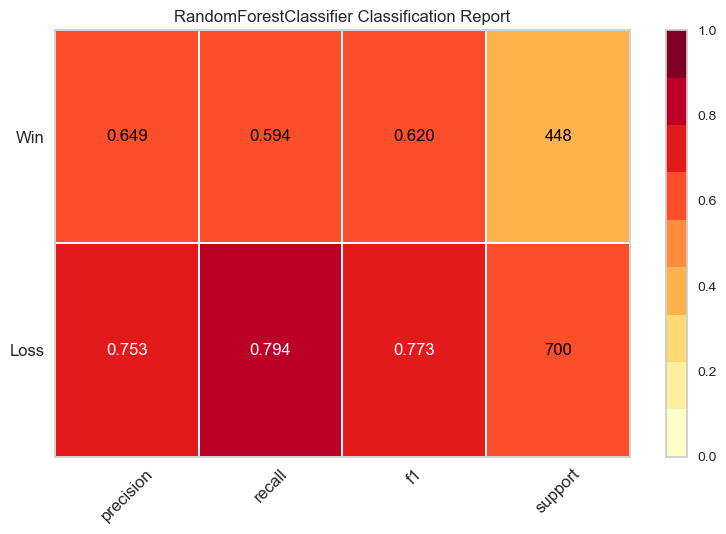

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [4]:

# Generate classification report for Random Forest
visualizer_rf = ClassificationReport(rf, classes=['Loss', 'Win'], support=True)
visualizer_rf.fit(train[predictors], train['target'])
visualizer_rf.score(test[predictors], test['target'])
visualizer_rf.show()


C:\Users\carso\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


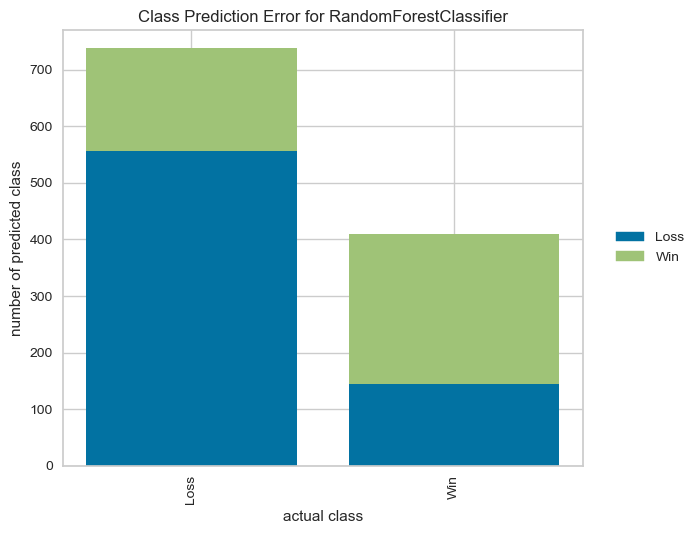

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [5]:
# Generate ClassPredictionError visualization for Random Forest
visualizer_rf_cpe = ClassPredictionError(rf, classes=['Loss', 'Win'])
visualizer_rf_cpe.fit(train[predictors], train['target'])
visualizer_rf_cpe.score(test[predictors], test['target'])
visualizer_rf_cpe.show()

In [6]:
# Calculate the accuracy score and precision of Gradient Boosting predictions
gb_acc = accuracy_score(test['target'], gb_preds)
gb_precision = precision_score(test['target'], gb_preds)
print("Gradient Boosting Accuracy:", gb_acc)
print("Gradient Boosting Precision:", gb_precision)


Gradient Boosting Accuracy: 0.7613240418118467
Gradient Boosting Precision: 0.7164179104477612


C:\Users\carso\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


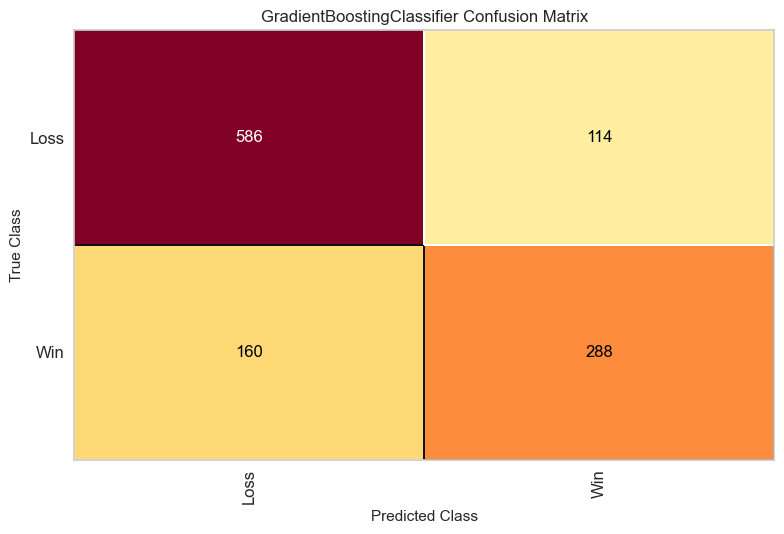

<AxesSubplot:title={'center':'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [7]:
# Generate confusion matrix for Gradient Boosting
cm_gb = ConfusionMatrix(gb, classes=['Loss', 'Win'], label_encoder={0: 'Loss', 1: 'Win'})
cm_gb.score(test[predictors], test['target'])
cm_gb.show()


C:\Users\carso\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


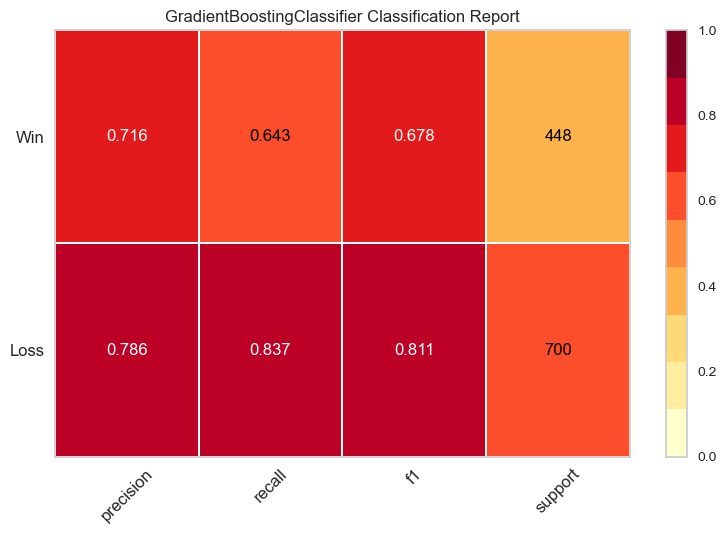

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [8]:
# Generate classification report for Gradient Boosting
visualizer_gb = ClassificationReport(gb, classes=['Loss', 'Win'], support=True)
visualizer_gb.fit(train[predictors], train['target'])
visualizer_gb.score(test[predictors], test['target'])
visualizer_gb.show()


C:\Users\carso\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


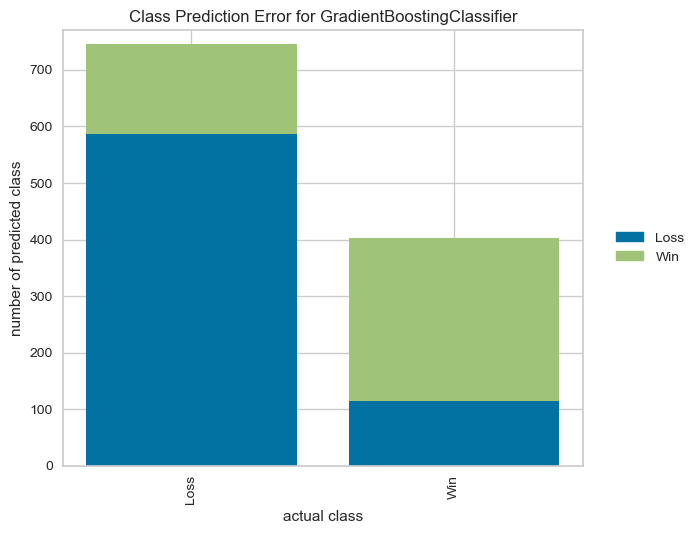

<AxesSubplot:title={'center':'Class Prediction Error for GradientBoostingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [9]:
# Generate ClassPredictionError visualization for Gradient Boosting
visualizer_gb_cpe = ClassPredictionError(gb, classes=['Loss', 'Win'])
visualizer_gb_cpe.fit(train[predictors], train['target'])
visualizer_gb_cpe.score(test[predictors], test['target'])
visualizer_gb_cpe.show()

In [10]:
# Filter the DataFrame based on the predicted values of Random Forest
rf_filtered = test[rf_preds == 1].copy()

# Save the Random Forest filtered DataFrame to a CSV file
rf_filtered.to_csv("RF_MLM.csv", index=False)

# Filter the DataFrame based on the predicted values of Gradient Boosting
gb_filtered = test[gb_preds == 1].copy()

# Save the Gradient Boosting filtered DataFrame to a CSV file
gb_filtered.to_csv("GB_MLM.csv", index=False)